In [1]:
import numpy as np

В цьому домашньому завданні відпрацюємо з вами знання, отримані в модулі зі статистики.

**Завдання 1.** Ми обговорили з Вами на лекції, що велика літера Сігма грецького алфавіту позначає в математиці суму. Знайдіть з використанням Python $\Sigma x$, $\Sigma x^2$, та $\Sigma (x-1)^2$ для наступного набору даних:
`1 3 4`
Виведіть результат кожного обчислення на екран.

In [2]:
data_set=[1,3,4]
sum_x=sum(data_set)
sum_x_sqr=sum([x**2 for x in data_set])
sum_x_sqr_m1=sum([(x-1)**2 for x in data_set])

In [3]:
sum_x, sum_x_sqr, sum_x_sqr_m1

(8, 26, 13)

**Завдання 2.** Ми зібрали дані про суму покупок в гривнях 20ма випадково обраними клієнтами в нашому магазині (всього клієнтів у нас більше) за минулий місяць. Вони представлені в змінній `sum_purchases`. Знайдіть **вибіркове середнє** для цих даних кожним з зазначених методів:   

  2.1. без використання жодних бібліотек, користуючись тільки Python.  
  2.2. використовуючи відповідний метод бібліотеки `numpy`.

  Виведіть результат обчислень в кожному з випадків на екран та порівняйте результати. Вони співпадають?

In [4]:
sum_purchases = [ 316,  493,  367,  153,  224,  121,  322,  450,  196,  397,  281,
  239,  484,  124,  223,  448,  432,  255, 4310, 3524]

In [5]:
purchases_mean=sum(sum_purchases)/len(sum_purchases)
purchases_mean

667.95

In [6]:
purchases_mean_np=np.mean(sum_purchases)
purchases_mean_np

667.95

**Завдання 3.** Для того ж набору даних в змінній `sum_purchases` обчисліть **медіану** кожним з зазначених методів:  

  3.1. без використання жодних бібліотек, користуючись тільки Python.  
  3.2. використовуючи відповідний метод бібліотеки numpy.  

Виведіть результат обчислень в кожному з випадків на екран. Порівняйте результати зі значенням вибіркового середнього. Напишіть коментар, для яких задач ви б використовували вибіркове середнє, а для яких - медіану?

In [7]:
len(sum_purchases)

20

In [8]:
purchases_sorted=sum_purchases.sort()
purchases_med=(sum_purchases[int((len(sum_purchases)/2)-1)]+sum_purchases[int(len(sum_purchases)/2)])/2
purchases_med

319.0

In [9]:
purchases_med_np=np.median(sum_purchases)
purchases_med_np

319.0

**Завдання 4**. Обчислість стандартне відхилення наведеної вибірки в змінній `sum_purchases` кожним з зазначених методів:  

  4.1. без використання жодних бібліотек, користуючись тільки Python.  
  4.2. використовуючи відповідний метод бібліотеки numpy.  

Виведіть результат обчислень в кожному з випадків на екран.

In [10]:
s_purchases=((sum([(x-purchases_mean)**2 for x in sum_purchases]))/(len(sum_purchases)-1))**0.5
s_purchases

1124.5433447451132

In [11]:
s_np=np.std(sum_purchases, ddof=1)
s_np

1124.5433447451132

**Завдання 5**. Ми провели дослідження віку студентів-першокурсників. Виявилось, що
- 10 студентів мають вік 16 років
- 25 студентів - 17 років
- 20 студентів - 18 років
- 2 студенти - 20 років

Обчислість середнє значення для цієї вибірки будь-яким способом - на чистому Python або з numpy - та виведіть результат на екран.

In [12]:
st=[10,25,20,2]
age=[16,17,18,20]
mean_age=sum([st[i]*age[i] for i in range(len(st))])/sum(st)
mean_age

17.280701754385966

**Завдання 6**. Крім даних про суму покупок, ми зібрали ще дані про кількість відвідувань кожного з кожного покупця, які знаходяться в змінній `visits`. Обчисліть коефіцієнт кореляції Пірсона для суми покупок і кількості відвідувань кожним з зазначених методів:  

  6.1. без використання жодних бібліотек, користуючись тільки Python.  
  6.2. використовуючи відповідний метод бібліотеки numpy.  
  
Виведіть результат на екран. Проаналізуйте результат.

Виведіть додатково графік розсіювання викликавши код нижче і зробіть заключення, чи варто щось змінити при підрахунку кореляції, аби коефіцієнт Пірсона показував коректну оцінку лінійної залежності?

In [13]:
visits = [ 6,  2, 10,  3,  9,  9,  2,  3,  6,  6, 10,  2,  5, 10,  3,  5,  4,
        7,  4,  2]

In [14]:
visit_mean=sum(visits)/len(visits)

In [15]:
s_visits=((sum([(x-visit_mean)**2 for x in visits]))/(len(visits)-1))**0.5

In [16]:
cov=sum([(visits[i]-visit_mean)*(sum_purchases[i]-purchases_mean) for i in range(len(visits))])/(len(visits)-1)
corr=cov/(s_purchases*s_visits)
corr

-0.2934882463344907

In [17]:
np.corrcoef(sum_purchases, visits)

array([[ 1.        , -0.29348825],
       [-0.29348825,  1.        ]])

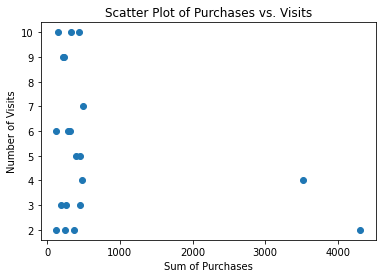

In [18]:
import matplotlib.pyplot as plt

plt.scatter(sum_purchases, visits)
plt.title('Scatter Plot of Purchases vs. Visits')
plt.xlabel('Sum of Purchases')
plt.ylabel('Number of Visits');

**Завдання 7**. В попередньому завданні ми помітили, що викиди нам заважають отримати "правдиве" значення кореляції. Давайте вилучимо записи, які відповідають значенням з викидами в сумі покупок і обчисліть коеф. кореляції. Для цього поставте `threshold`, який дорінює середньому значенню + 2 стандартних вдіхилля суми покупок і всі значення, які більше за нього, будемо вважати викидами (є і інші правила для визначення викидів - з ним и познайомимось пізніше).

Вилучіть значення з обох масивів і обчисліть коеф. кореляції Пірсона з допомогою `numpy` для кількості візитів і суми покупок без записів-викидів. Виведіть результат на екран, побудуйте діаграму розсіювання і проаналізуйте результат: що можемо сказати про залежність в даних?

In [19]:
np.corrcoef(visits[:-2], sum_purchases[:-2])

array([[ 1.        , -0.02083111],
       [-0.02083111,  1.        ]])

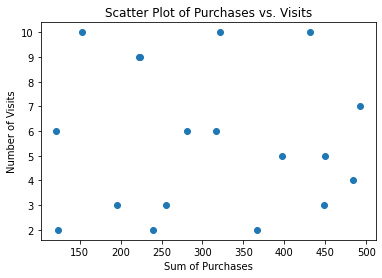

In [20]:
import matplotlib.pyplot as plt

plt.scatter(sum_purchases[:-2], visits[:-2])
plt.title('Scatter Plot of Purchases vs. Visits')
plt.xlabel('Sum of Purchases')
plt.ylabel('Number of Visits');